In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_train= pd.read_csv(r'E:\final year project\justifi-legal-ai\ml_model\binary_train_processed.csv')

In [3]:
df_train.head()

,filename,label,num_characters,num_words,num_sentences,transformed_text
0,Calcutta_High_Court_Appellete_Side_2008_2020_2...,0,8038,1460,1,judgment april bhaskar appeals arise cases sec...
1,Bombay_HC_BomHC_1937_179,0,34012,6793,16,beaumont appeal decision sitting bankruptcy fa...
2,karnataka_HC_1998_425,0,12431,2378,11,appellant filed appeal assailing order learned...
3,Bombay_HC_BomHC_1994_60,1,24862,4576,2,petitioner forbes forbes campbel company limit...
4,Madras_HC_2017_4649,1,12541,2197,2,writ petitioner allotted plot extent executing...


In [4]:
df_test=pd.read_csv(r'E:\final year project\justifi-legal-ai\ml_model\binary_test_processed.csv')

In [5]:
df_test.head()

,filename,label,num_characters,num_words,num_sentences,transformed_text
0,Patna_HC_1983_90,1,5693,1104,1,plaintiffs appellants judgment suit concerns h...
1,Madras_HC_2009_658,0,5378,999,1,judgment court present appeal judgment dated p...
2,karnataka_HC_2018_2747,0,11666,2133,16,sanmathi adv vani adv filed appeal income tax ...
3,Madras_HC_1991_413,0,37843,6981,1,govindasamy lakshmi vilas bank respondent comp...
4,Kerala_HC_1995_739,0,1340,229,1,petitioner lpg distributor kondotty district s...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.9,
    sublinear_tf=True
)

In [7]:
X_train = tfidf.fit_transform(df_train['transformed_text'])

In [8]:
X_train.shape

(301059, 50000)

In [9]:
y_train = df_train['label']

In [10]:
y_train.value_counts()

label
0    152667
1    148392
Name: count, dtype: int64

In [11]:
X_test  = tfidf.transform(df_test['transformed_text'])

In [12]:
y_test = df_test['label']

In [13]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score

In [14]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [15]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.6516735063998977
[[31230 12587]
 [17375 24825]]
0.6635571474393243


In [16]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.645604938558657
[[28895 14922]
 [15562 26638]]
0.6409528392685274


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, classification_report
from xgboost import XGBClassifier

In [18]:
clfs = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ),
    "Linear SVM": LinearSVC(
        class_weight="balanced"
    ),
    "Naive Bayes": MultinomialNB()
}

In [19]:

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1


In [21]:
results = []

for name, clf in clfs.items():
    acc, prec, rec, f1 = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )
    
    print(f"\nModel: {name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })


Model: Logistic Regression
Accuracy : 0.7595
Precision: 0.7556
Recall   : 0.7535
F1-score : 0.7545

Model: Linear SVM
Accuracy : 0.7574
Precision: 0.7511
Recall   : 0.7559
F1-score : 0.7535

Model: Naive Bayes
Accuracy : 0.6517
Precision: 0.6636
Recall   : 0.5883
F1-score : 0.6236


In [22]:
performance_df = pd.DataFrame(results)

In [23]:
performance_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.759478,0.755590,0.753460,0.754524
1,Linear SVM,0.757362,0.751124,0.755877,0.753493
2,Naive Bayes,0.651674,0.663557,0.588270,0.623650


In [25]:
performance_df1 = pd.melt(performance_df, id_vars = "Model")

In [26]:
performance_df1

,Model,variable,value
0,Logistic Regression,Accuracy,0.759478
1,Linear SVM,Accuracy,0.757362
2,Naive Bayes,Accuracy,0.651674
3,Logistic Regression,Precision,0.755590
4,Linear SVM,Precision,0.751124
5,Naive Bayes,Precision,0.663557
6,Logistic Regression,Recall,0.753460
7,Linear SVM,Recall,0.755877
8,Naive Bayes,Recall,0.588270
9,Logistic Regression,F1-score,0.754524


NameError: name 'plt' is not defined

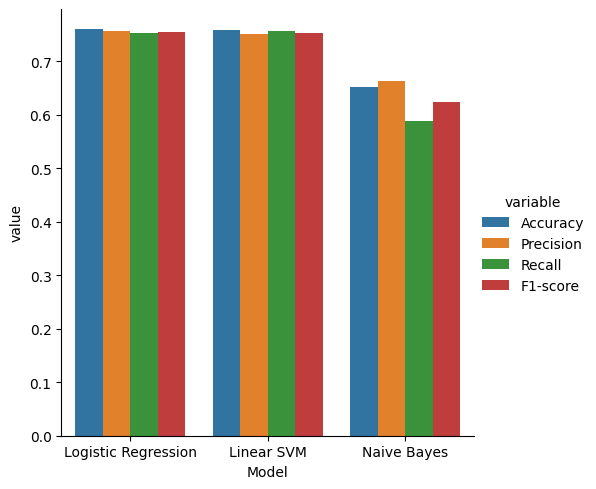

In [31]:
sns.catplot(x = 'Model', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(max_iter=1000, class_weight="balanced")
svm = LinearSVC(class_weight="balanced")
nb  = MultinomialNB()

In [33]:
voting = VotingClassifier(
    estimators=[('lr', lr), ('svm', svm), ('nb', nb)],
    voting='hard' 
)

In [34]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

In [35]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))

Accuracy : 0.7587453642884546
Precision: 0.7595855925639039
recall: 0.7436018957345971
f1: 0.7515087652073953
